In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../RF_datasets/2016-revised.csv")
df.index = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
df.head()

,Unnamed: 0,pop,deaths,depression,edu,employ,strat,income,religion
AL,AL,4863300,7.5,5,24.5,5.8,5,46257,0.77
AK,AK,741894,12.5,3,29.0,6.9,4,76440,0.45
AZ,AZ,6931071,11.4,3,28.4,5.4,4,53558,0.53
AR,AR,2988248,5.9,5,22.0,4.0,5,44334,0.70
CA,CA,39250017,4.9,4,32.6,5.5,1,67739,0.49


In [3]:
df = df.drop(['strat', 'pop', 'Unnamed: 0'], axis=1)

df.head()

,deaths,depression,edu,employ,income,religion
AL,7.5,5,24.5,5.8,46257,0.77
AK,12.5,3,29.0,6.9,76440,0.45
AZ,11.4,3,28.4,5.4,53558,0.53
AR,5.9,5,22.0,4.0,44334,0.70
CA,4.9,4,32.6,5.5,67739,0.49


In [4]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.1)

x_train = train.drop('deaths', axis=1)
y_train = train['deaths']

x_test = test.drop('deaths', axis = 1)
y_test = test['deaths']

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [6]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
mse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = mean_squared_error(y_test,pred) #calculate rmse
    mse_val.append(error) #store rmse values
    print('MSE value for k= ' , K , 'is:', error)

MSE value for k=  1 is: 317.596
MSE value for k=  2 is: 159.666
MSE value for k=  3 is: 167.63533333333334
MSE value for k=  4 is: 129.576125
MSE value for k=  5 is: 111.04735999999998
MSE value for k=  6 is: 110.78561111111114
MSE value for k=  7 is: 114.76563265306122
MSE value for k=  8 is: 102.94925
MSE value for k=  9 is: 95.00797530864199
MSE value for k=  10 is: 80.90930000000003
MSE value for k=  11 is: 76.73132231404962
MSE value for k=  12 is: 77.64429166666669
MSE value for k=  13 is: 76.67287573964498
MSE value for k=  14 is: 67.21662244897959
MSE value for k=  15 is: 62.09362666666668
MSE value for k=  16 is: 64.86266406250002
MSE value for k=  17 is: 62.23723875432527
MSE value for k=  18 is: 60.278790123456794
MSE value for k=  19 is: 60.637462603878134
MSE value for k=  20 is: 54.64494500000001


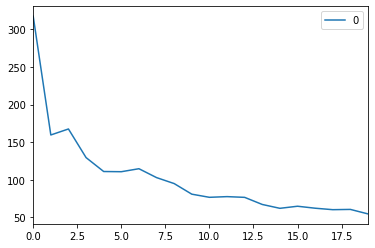

In [8]:
#plotting the rmse values against k values
curve = pd.DataFrame(mse_val) #elbow curve 
curve.plot()

In [9]:
x_train = df.drop(['deaths'], axis=1)
y_train = df['deaths']

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

In [10]:
model = neighbors.KNeighborsRegressor(n_neighbors = 5)
model.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [16]:
test_data = pd.read_csv("2020_data.csv")
test_data.index = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

In [17]:
test_data = test_data.drop(['Unnamed: 0'], axis=1)
test_data.head()

,depression,edu,employ,income,religion
AL,5.0,47.0,2.7,48486.0,0.82
AK,4.0,45.0,5.8,76715.0,0.55
AZ,4.0,48.0,4.5,56213.0,0.62
AR,5.0,42.0,3.5,45726.0,0.77
CA,3.0,56.0,3.9,71228.0,0.54


In [18]:
test_data_scaled = scaler.fit_transform(x_train)
test_data = pd.DataFrame(test_data_scaled)

In [21]:
predict_results = model.predict(test_data)

In [22]:
print(predict_results)

[16.58 11.48 13.26 15.02 12.14 14.6  21.86  9.04 19.38 15.02 12.06  9.26
 12.64 14.44  6.1   8.   15.38 17.68 12.56 17.72 23.16 17.86 14.5  15.58
 18.86  8.56  7.4  16.96 23.16 17.72 17.08 12.64 13.96  5.26 16.66 16.92
 10.46 18.5  13.6  16.9   6.76 12.82 14.82  8.54 23.3  16.76 14.16 17.68
  9.88 16.96]


In [23]:
D = {'' : ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']}
predict = pd.DataFrame(data =D)

In [25]:
for i in range(50):
    predict.set_value(i, "2020_predicted_death_rate", predict_results[i])

/Users/samsonweiner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
